In [89]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns 

In [90]:
df=pd.read_csv("C:/Users/ADMIN 8/Desktop/DEVTOWN/GFG/PROJECTS/BLACK FRIDAY SALE/BlackFriday.csv")

In [91]:
del df['Product_Category_2']
del df['Product_Category_3']

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Analyzing Columns

##### Customers 

In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

##### Products 

In [9]:
df['Product_ID'].nunique()

3623

In [10]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

##### Gender 

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

##### Age

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

##### Occupation

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

##### City

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

##### Stay_In_Current_City_Years

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

##### Product_Category_1

In [16]:
df['Product_Category_1'].nunique()

18

##### Avg Purchase 

In [17]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

##### Automation

# Analyzing Gender

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Text(0.5, 1.0, 'Products purchased by Male and Female')

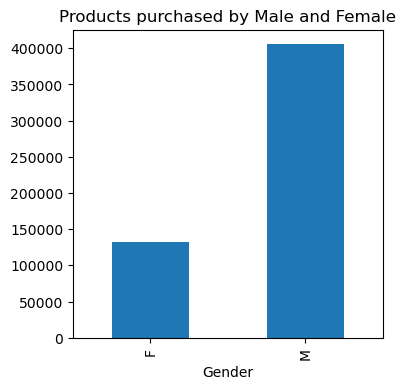

In [49]:
df.groupby('Gender').size().plot.bar(figsize=(4,4))
plt.title('Products purchased by Male and Female')

Text(0.5, 1.0, 'Products purchased by Male and Female')

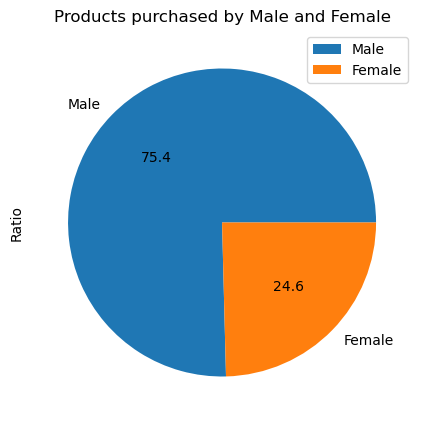

In [20]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data.plot.pie(y='Ratio',figsize=(5,5),autopct="%.1f")
plt.title('Products purchased by Male and Female')

Text(0.5, 1.0, 'Amount spent by male and female')

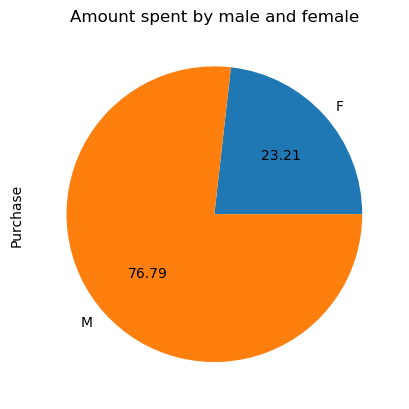

In [23]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.2f')
plt.title('Amount spent by male and female')

Text(0.5, 1.0, 'Avg Amount spent by male and female')

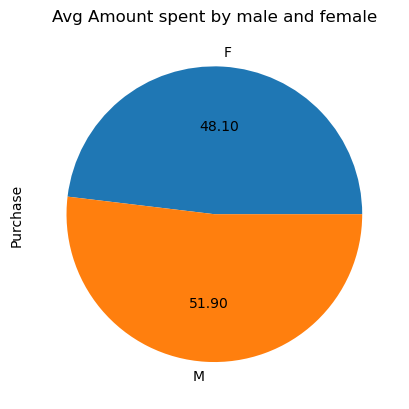

In [25]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
gender_purchase_mean = df.groupby('Gender')['Purchase'].mean()
gender_purchase_mean.plot(kind='pie', autopct='%.2f')
plt.title('Avg Amount spent by male and female')

# Analysing Age & Marital Status

Text(0.5, 1.0, 'Products purchased by age')

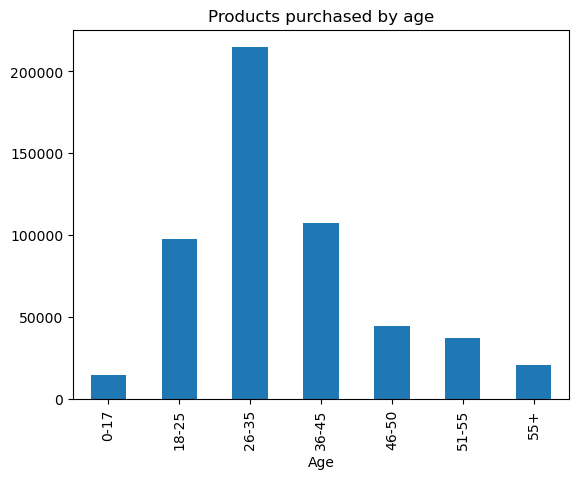

In [88]:
df.groupby('Age').size().plot(kind='bar')
plt.title('Products purchased by age')

In [78]:
for i in df['Age'].unique():
    print('Products purchased by',i,':',df[df['Age']==i]['Product_ID'].nunique())

Products purchased by 0-17 : 2300
Products purchased by 55+ : 2573
Products purchased by 26-35 : 3419
Products purchased by 46-50 : 3099
Products purchased by 51-55 : 2877
Products purchased by 36-45 : 3318
Products purchased by 18-25 : 3213


In [24]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


Text(0.5, 1.0, 'Unique products purchased')

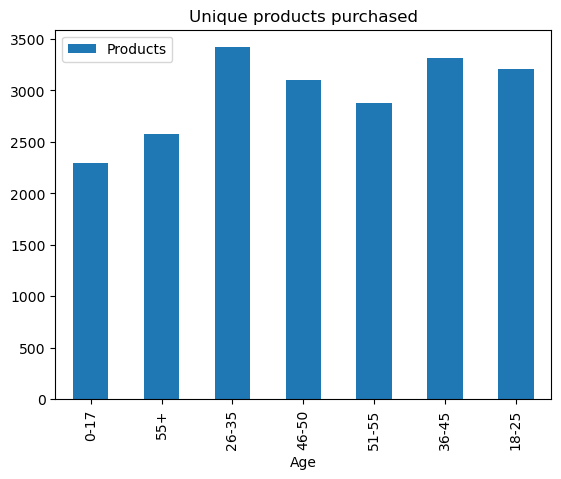

In [85]:
data.plot.bar(x='Age')
plt.title('Unique products purchased')

Text(0.5, 1.0, 'Amount spent by Age')

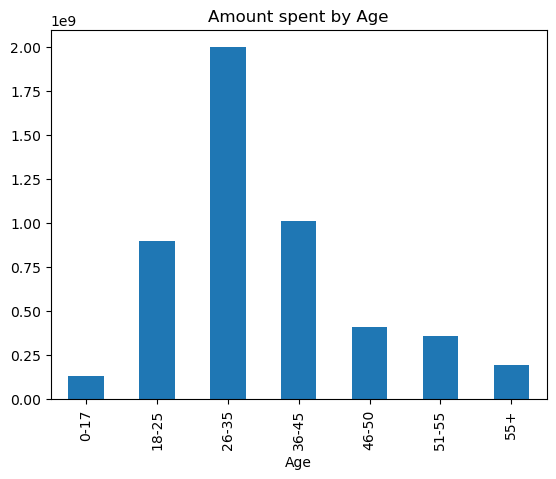

In [90]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')
plt.title('Amount spent by Age')

Text(0.5, 1.0, 'Avg Amount spent by Age')

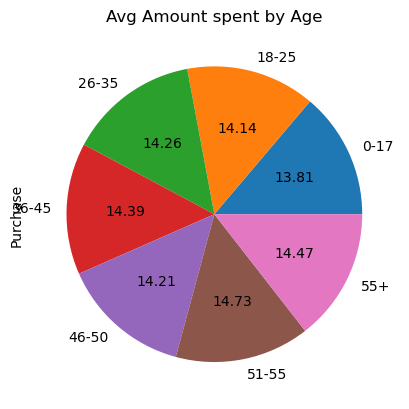

In [94]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
age_amount = df.groupby('Age')['Purchase'].mean()
age_amount.plot(kind='pie',autopct='%.2f')
plt.title('Avg Amount spent by Age')


In [93]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'Marital Status')

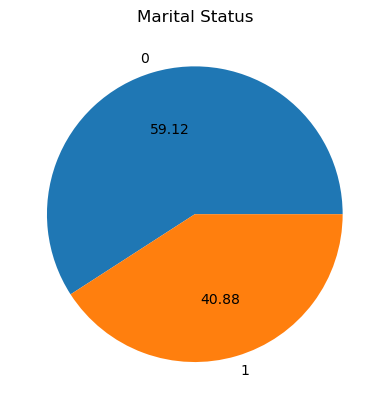

In [99]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.2f')
plt.title('Marital Status')

In [38]:
d1=df[df['Gender']=='F']['Marital_Status'].value_counts()
d2=df[df['Gender']=='M']['Marital_Status'].value_counts()

In [36]:
d3=pd.DataFrame([d1,d2],index=['Female','Male'])
d3=d3.rename(columns={0:'Unmarried',1:'Married'})

array([<Axes: ylabel='Unmarried'>, <Axes: ylabel='Married'>], dtype=object)

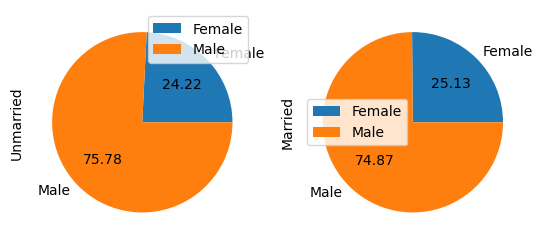

In [46]:
d3.plot(kind="pie",subplots=True,autopct='%.2f')

# Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

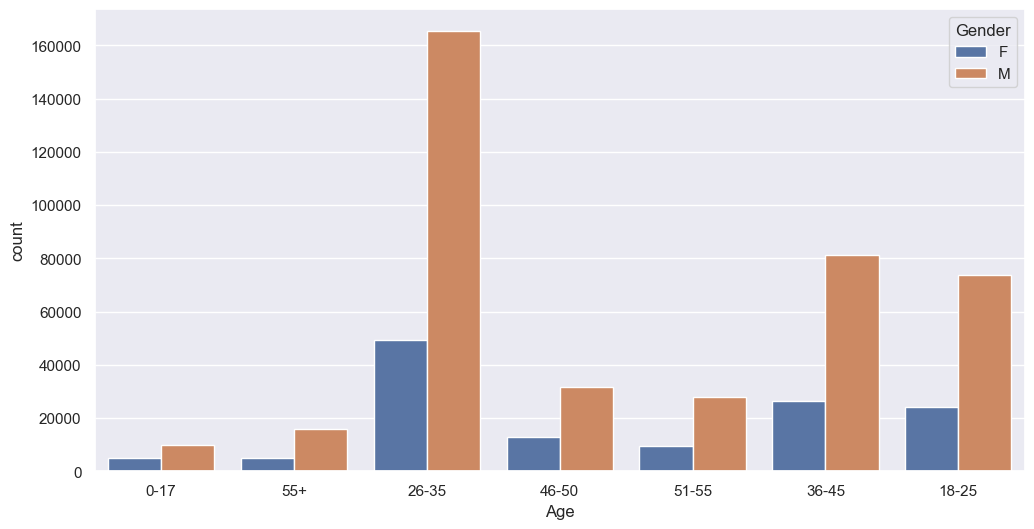

In [57]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

Text(0.5, 1.0, 'Age and Gender VS Purchasing power')

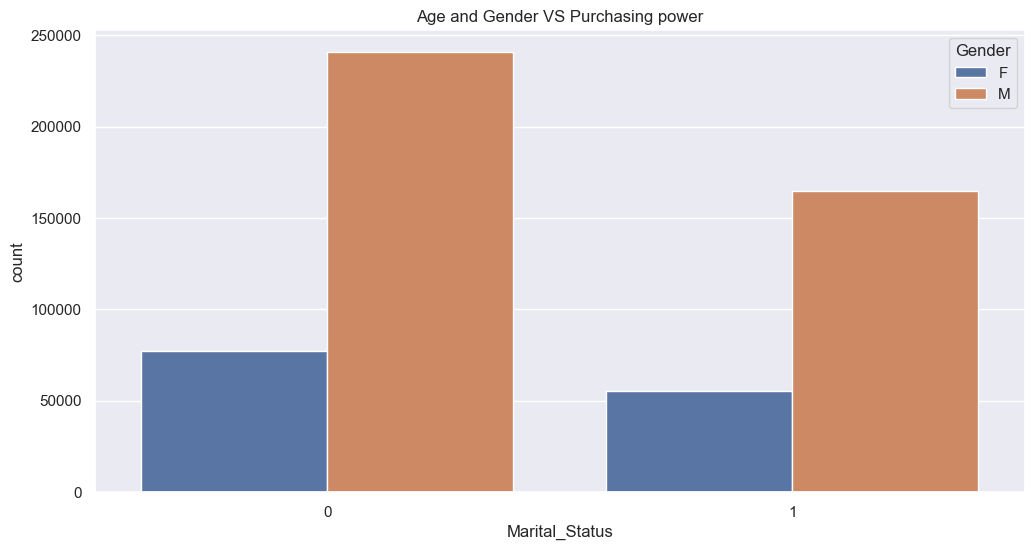

In [56]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

<Axes: >

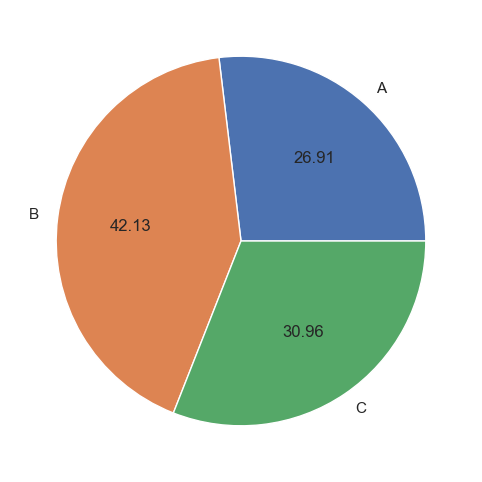

In [69]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Age', ylabel='count'>

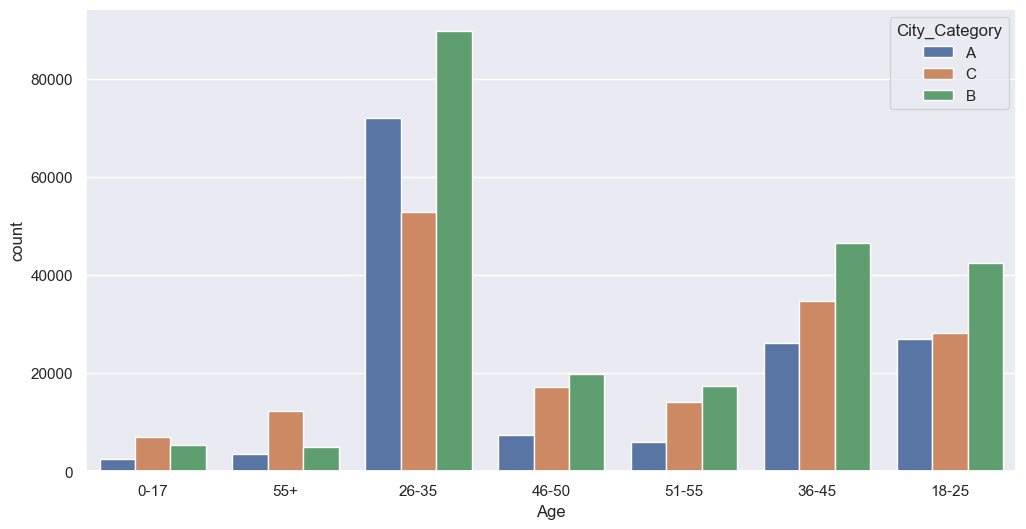

In [74]:
sns.countplot(x='Age',hue='City_Category',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

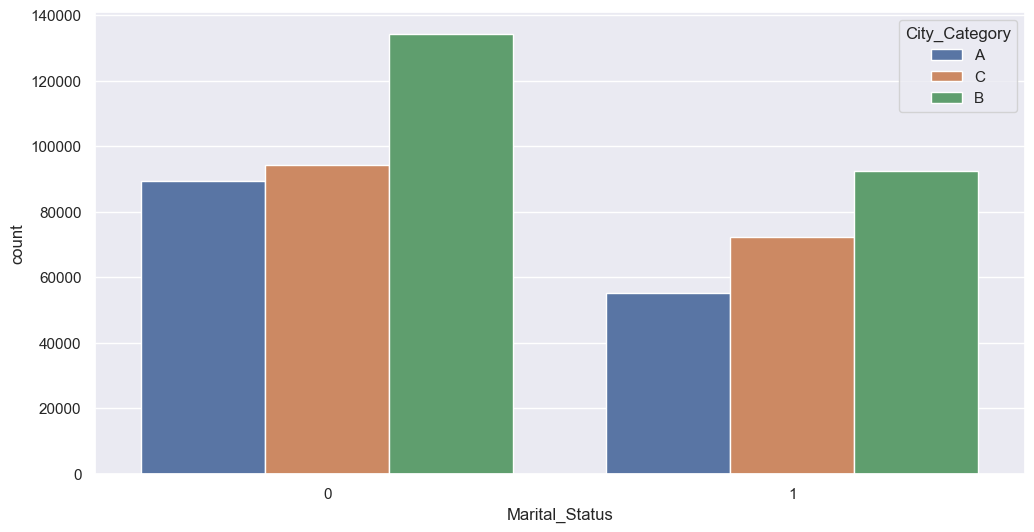

In [76]:
sns.countplot(x='Marital_Status',hue='City_Category',data=df)

<Axes: ylabel='Purchase'>

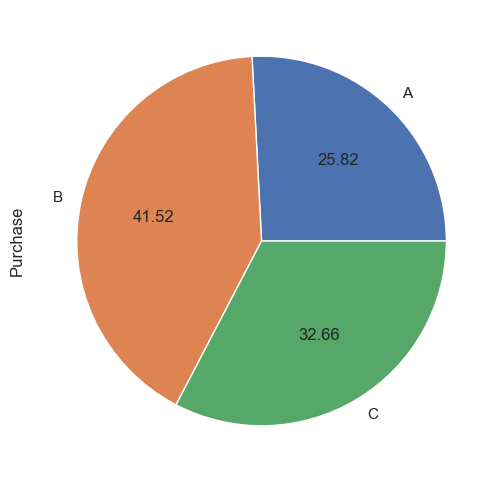

In [84]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.2f')

Text(0.5, 1.0, 'Avg Amount spent by City')

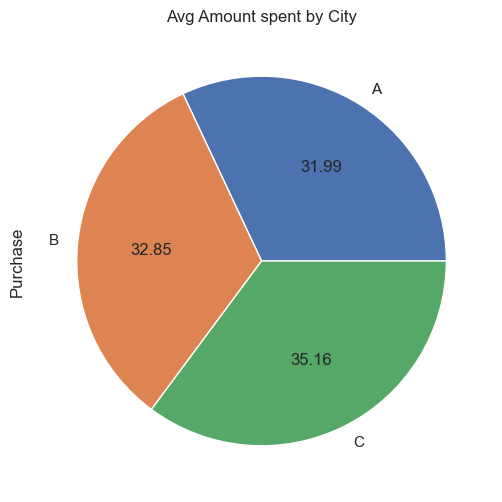

In [81]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
city_p = df.groupby('City_Category')['Purchase'].mean()
city_p.plot(kind='pie',autopct='%.2f')
plt.title('Avg Amount spent by City')

# Occupation and Products Analysis

In [92]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

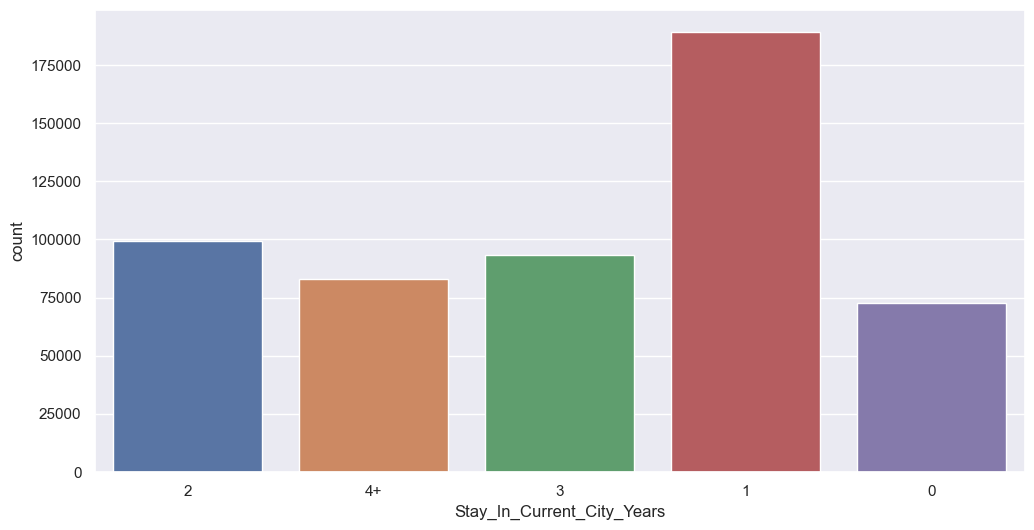

In [93]:
sns.countplot(x=df.Stay_In_Current_City_Years)

<Axes: >

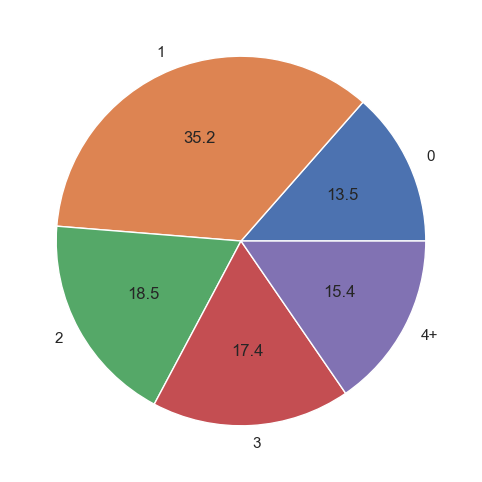

In [101]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

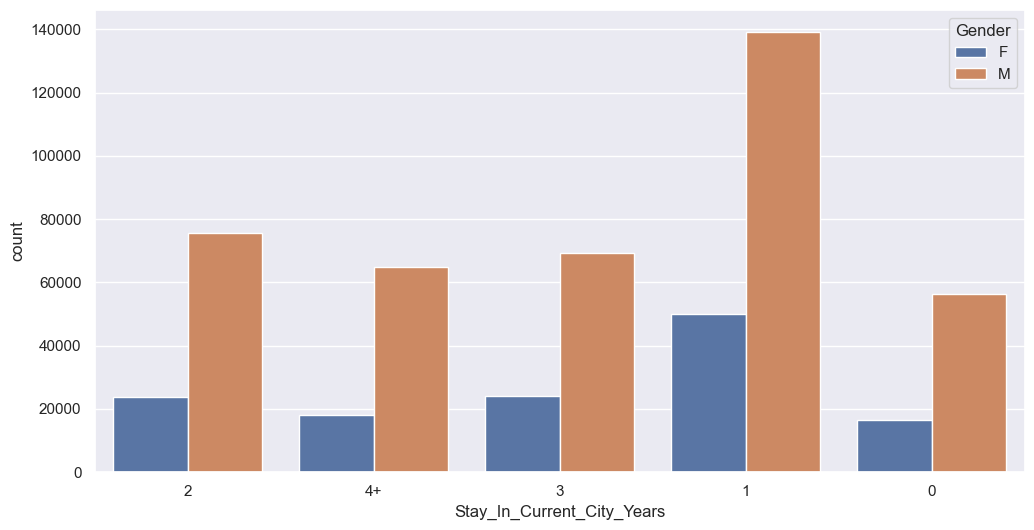

In [96]:
sns.countplot(x=df.Stay_In_Current_City_Years,hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

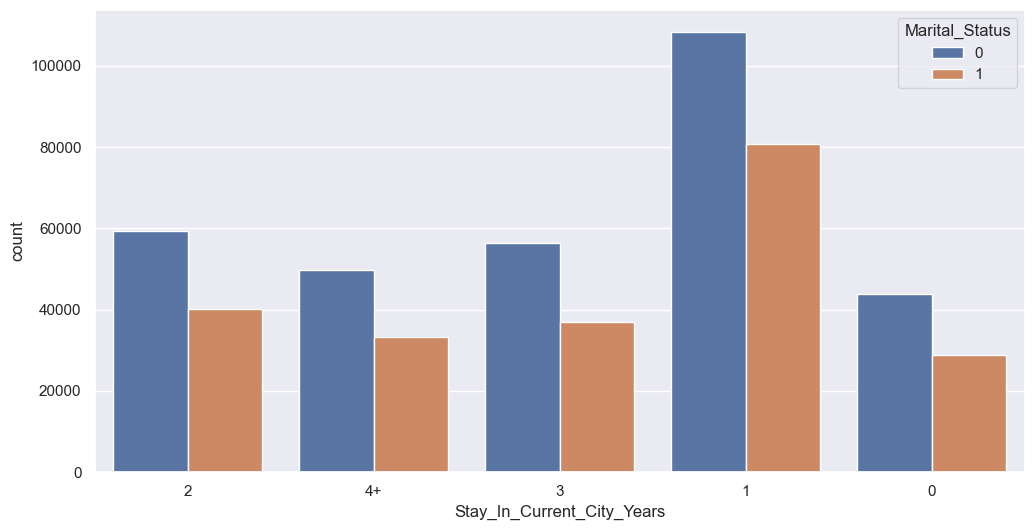

In [97]:
sns.countplot(x=df.Stay_In_Current_City_Years,hue='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

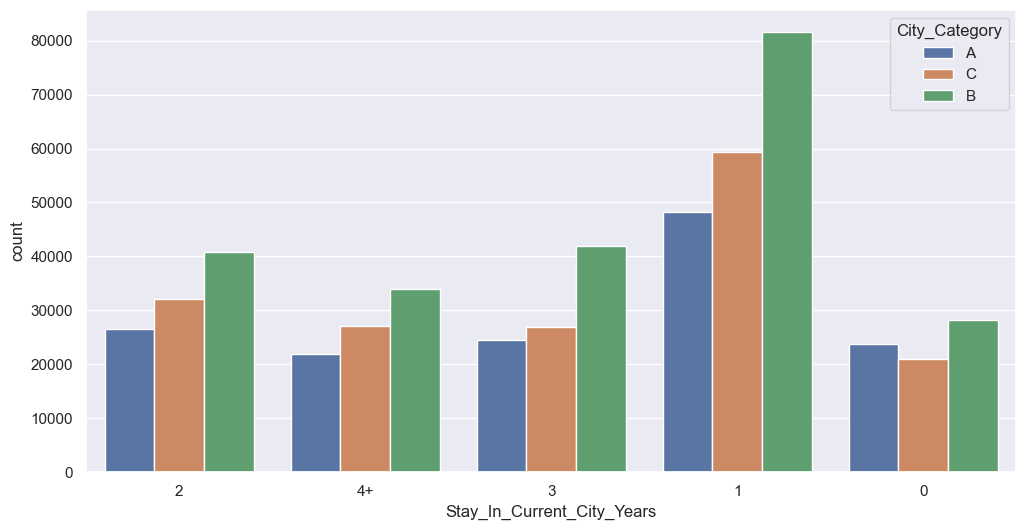

In [98]:
sns.countplot(x=df.Stay_In_Current_City_Years,hue='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

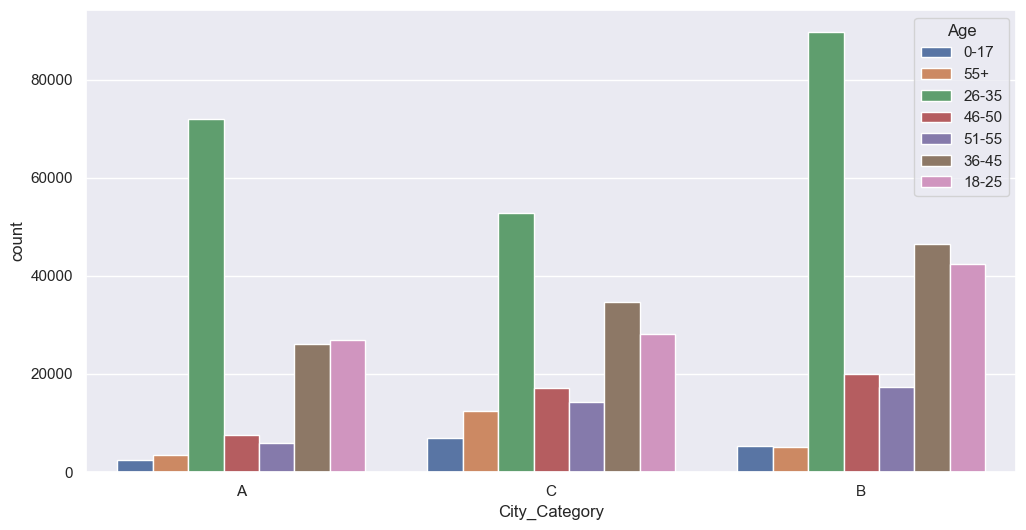

In [99]:
sns.countplot(x=df.City_Category,hue='Age',data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

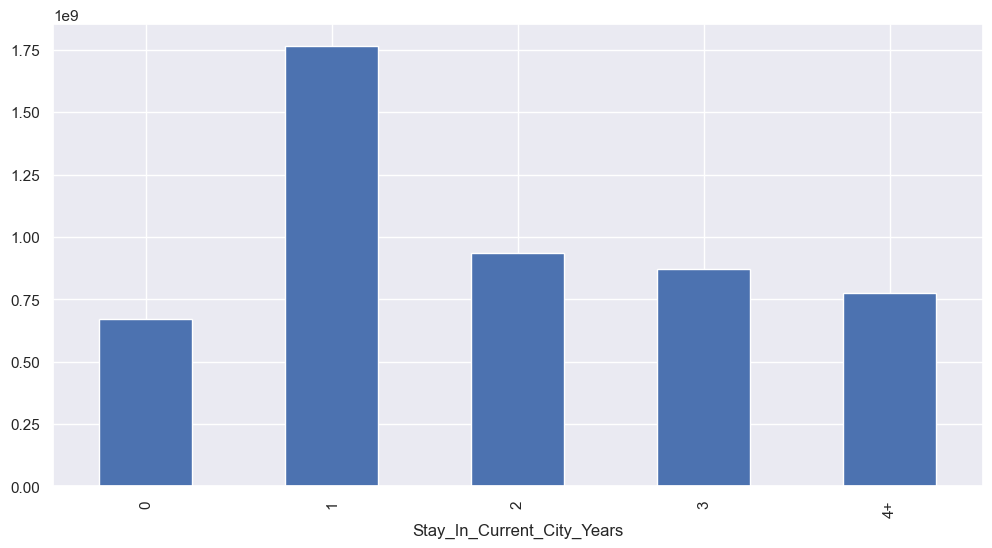

In [103]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

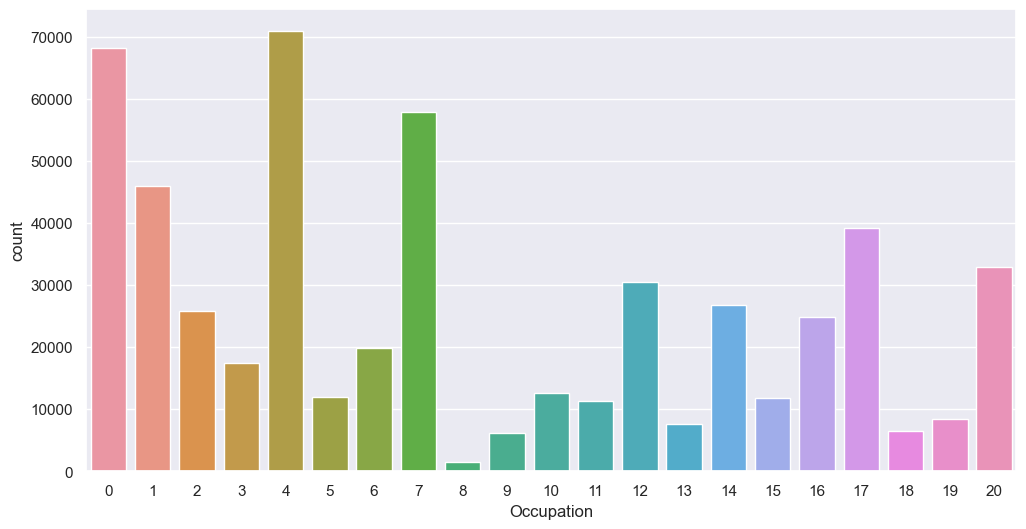

In [104]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

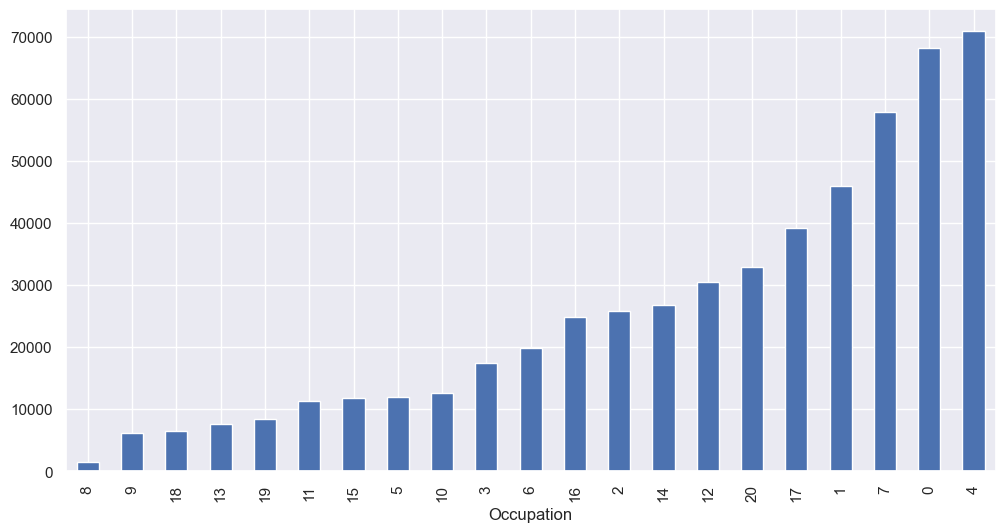

In [110]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

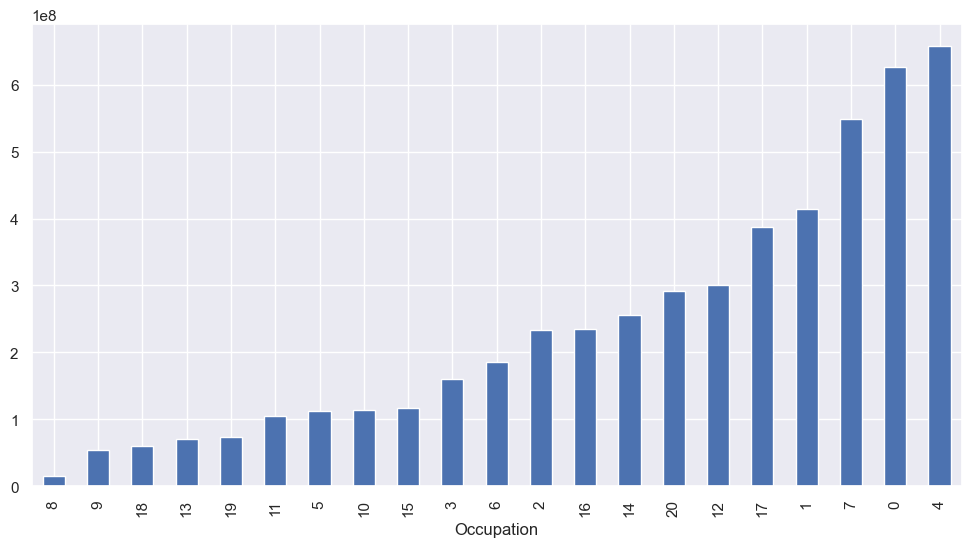

In [111]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

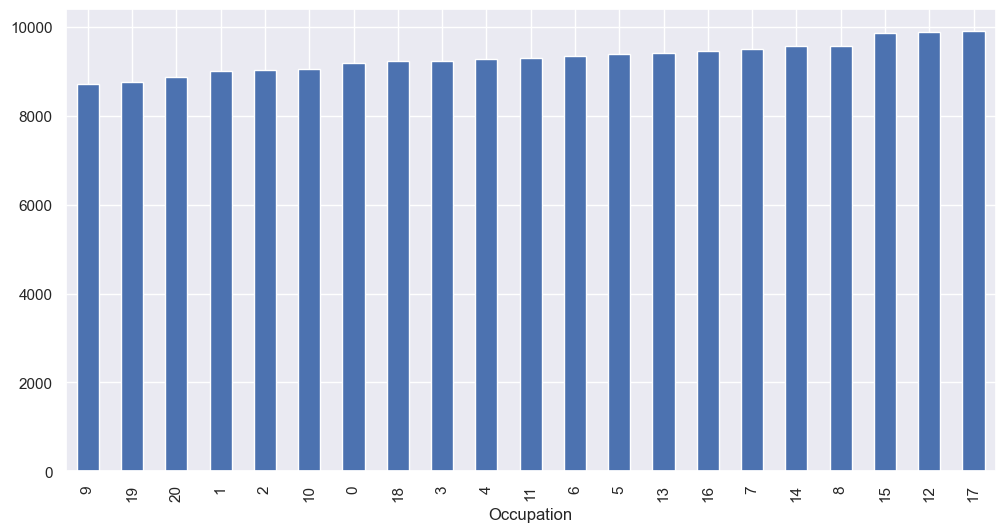

In [114]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
occ_p = df.groupby('Occupation')['Purchase'].mean().sort_values()
occ_p.plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

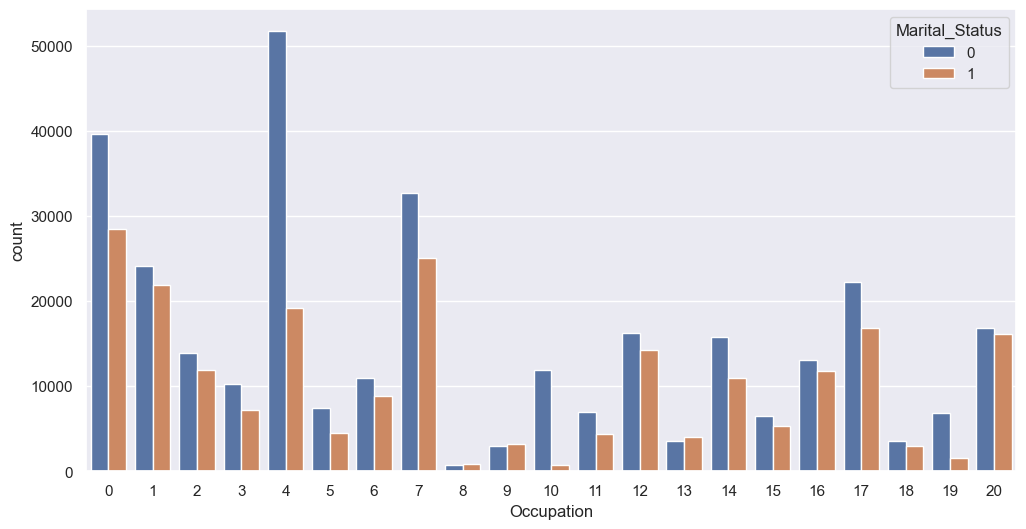

In [116]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation'>

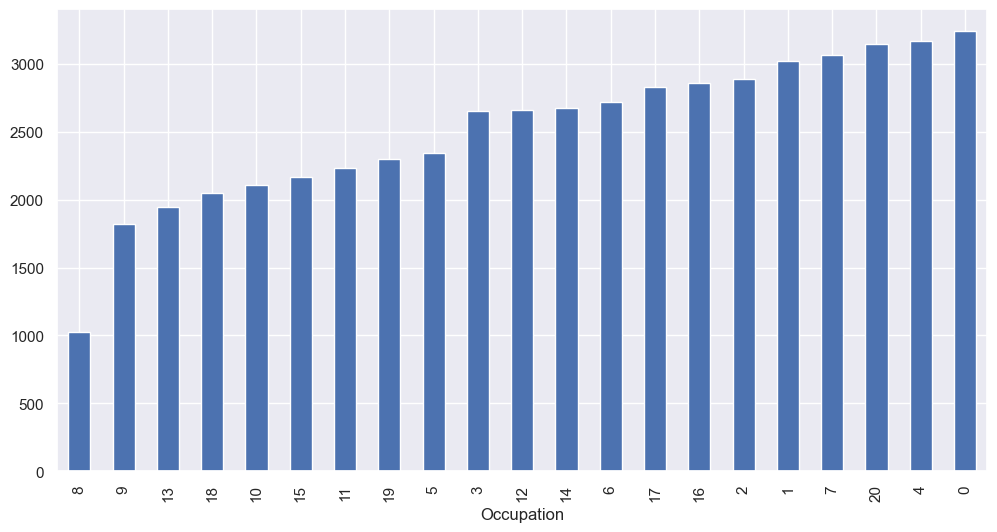

In [122]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

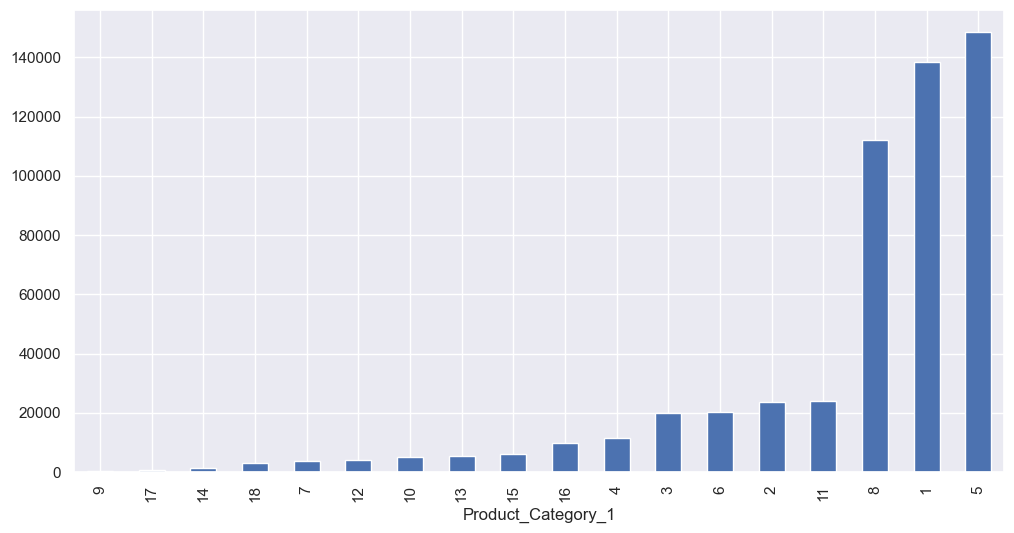

In [129]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

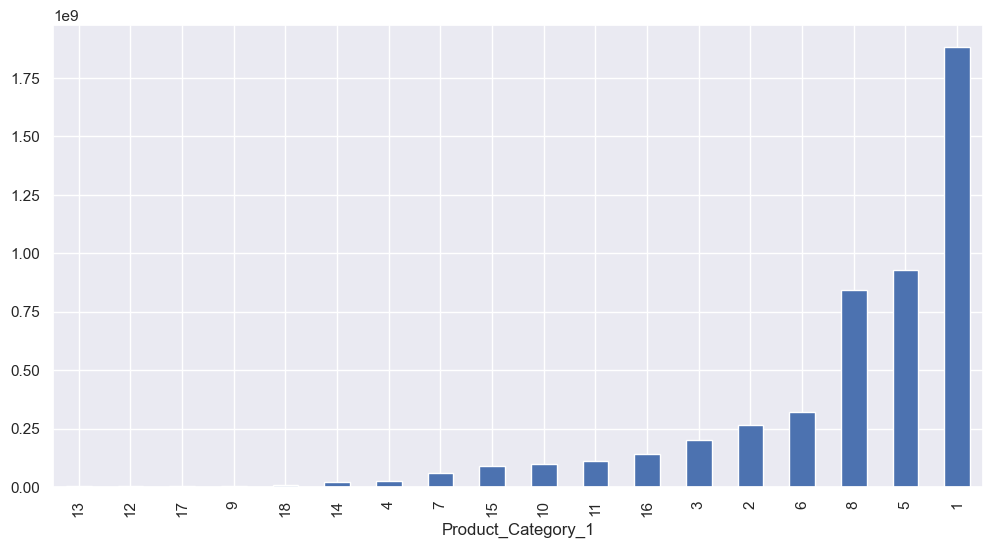

In [130]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

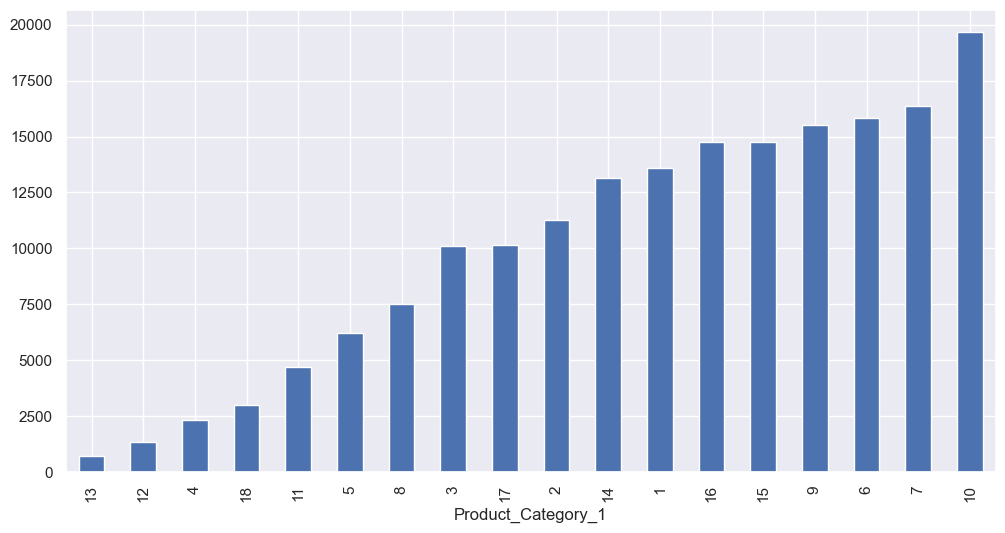

In [131]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
occ_p = df.groupby('Product_Category_1')['Purchase'].mean().sort_values()
occ_p.plot(kind='bar')

<Axes: xlabel='Product_ID'>

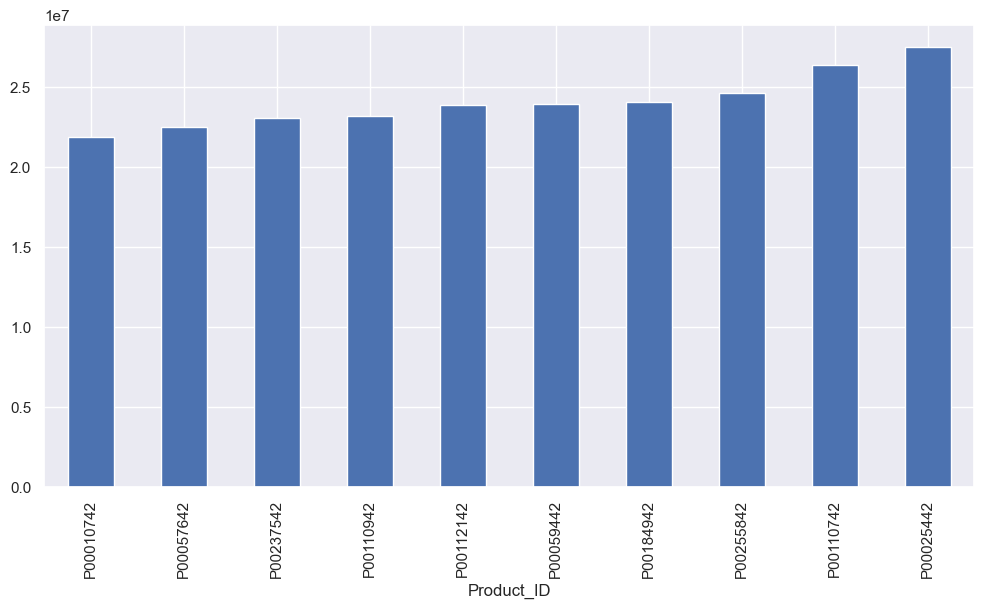

In [132]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

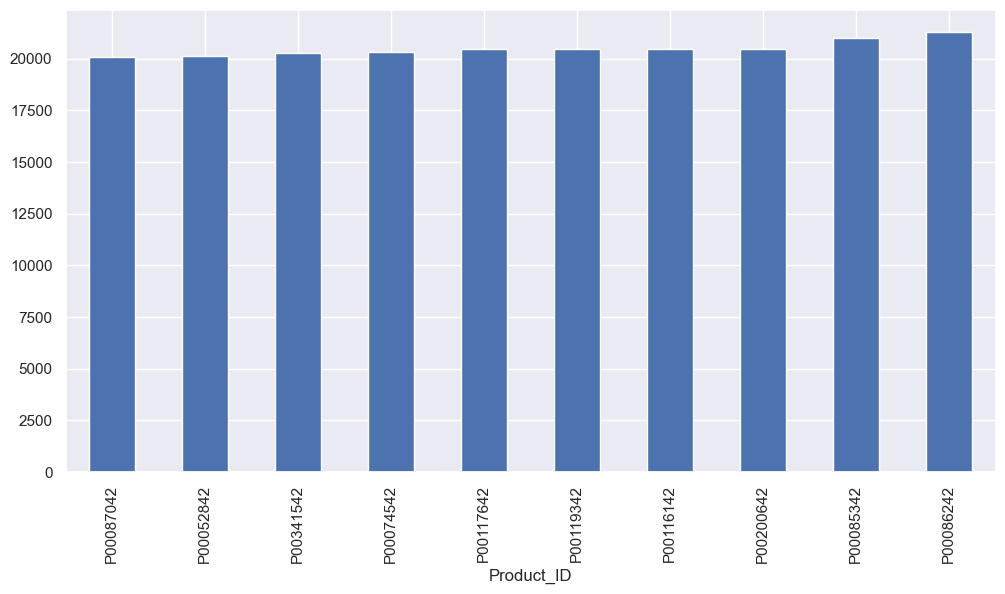

In [133]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
occ_p = df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values()
occ_p.plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

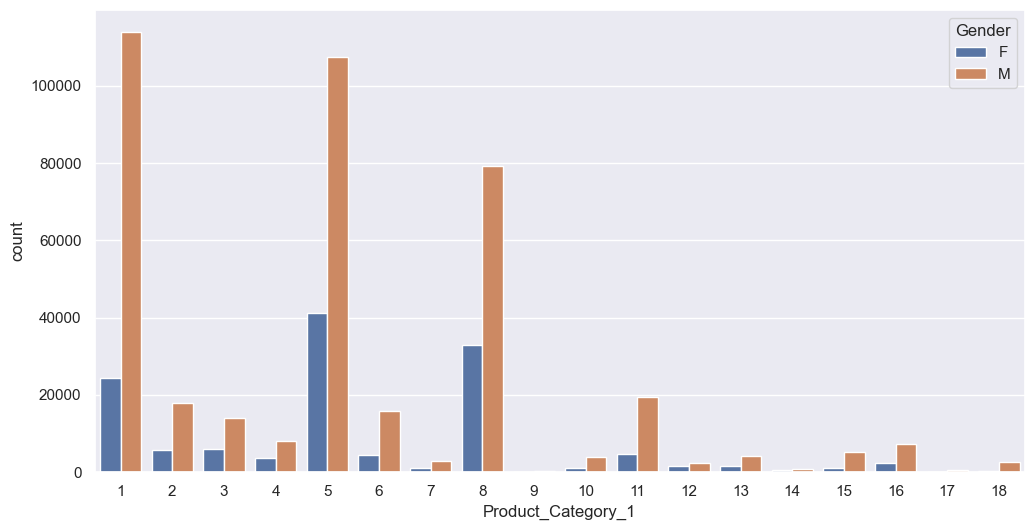

In [134]:
sns.countplot(x='Product_Category_1',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

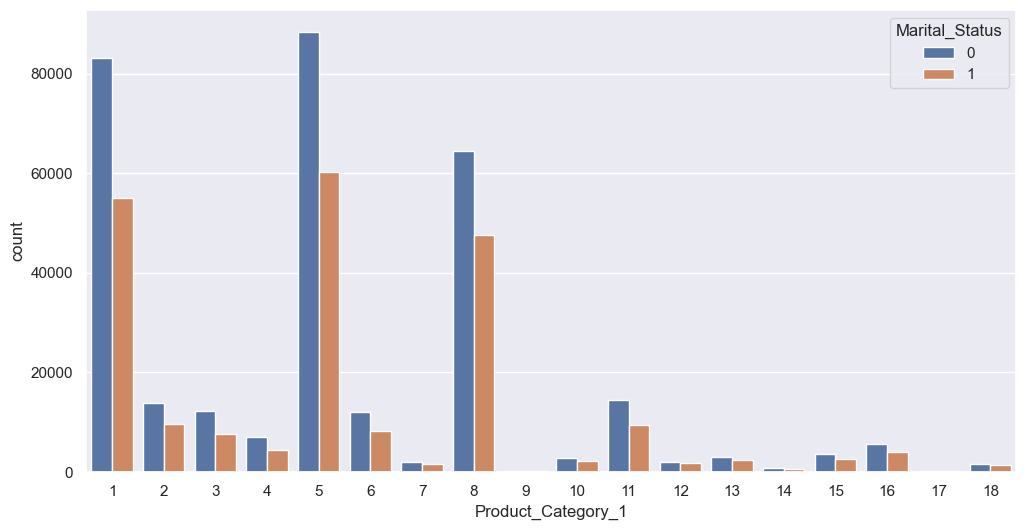

In [135]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data=df)

# Combining Gender & Marital Status

In [142]:
l=[]
for i in range(len(df)):
    l.append(str(df['Gender'][i])+"_"+str(df['Marital_Status'][i]))
df['Marital_Gender']=l

In [143]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

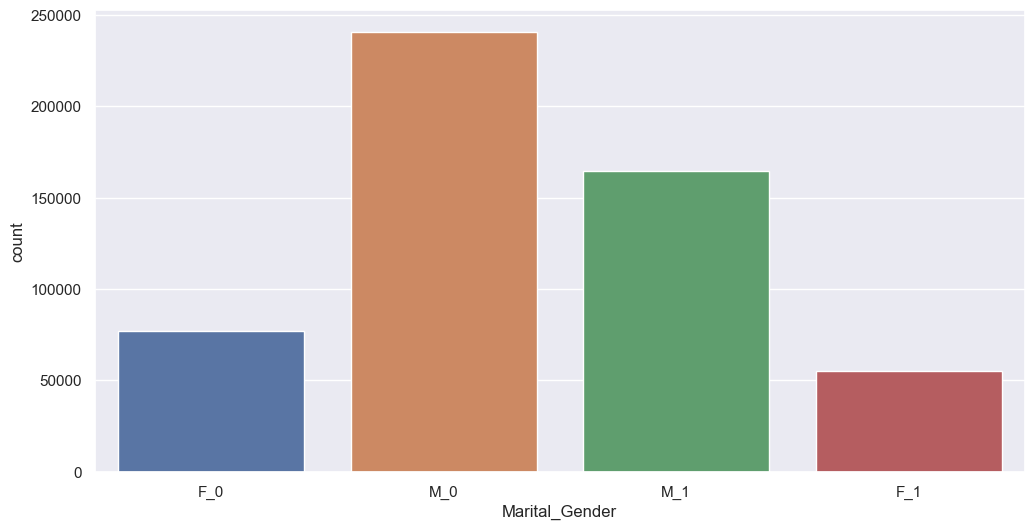

In [146]:
sns.countplot(x=df.Marital_Gender)

<Axes: xlabel='Age', ylabel='count'>

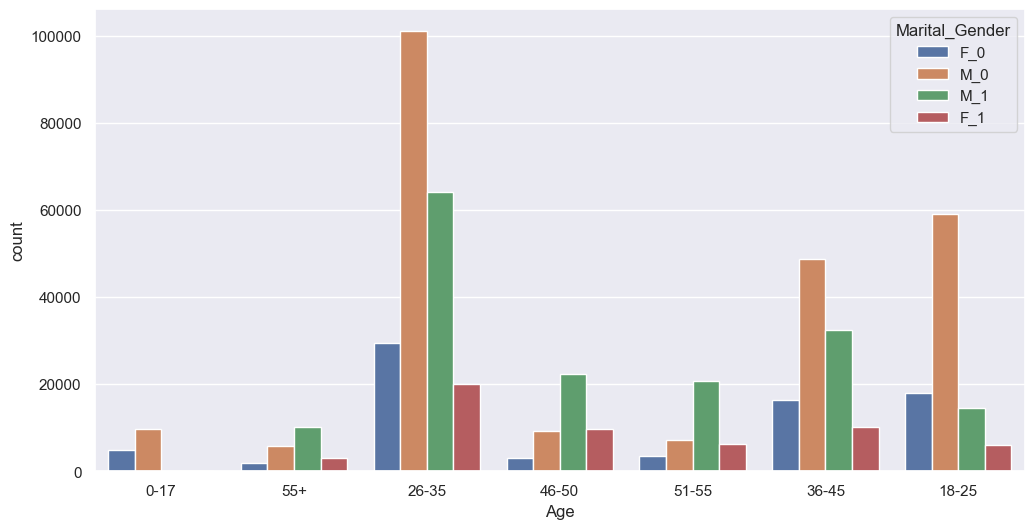

In [147]:
sns.countplot(x=df.Age,hue=df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

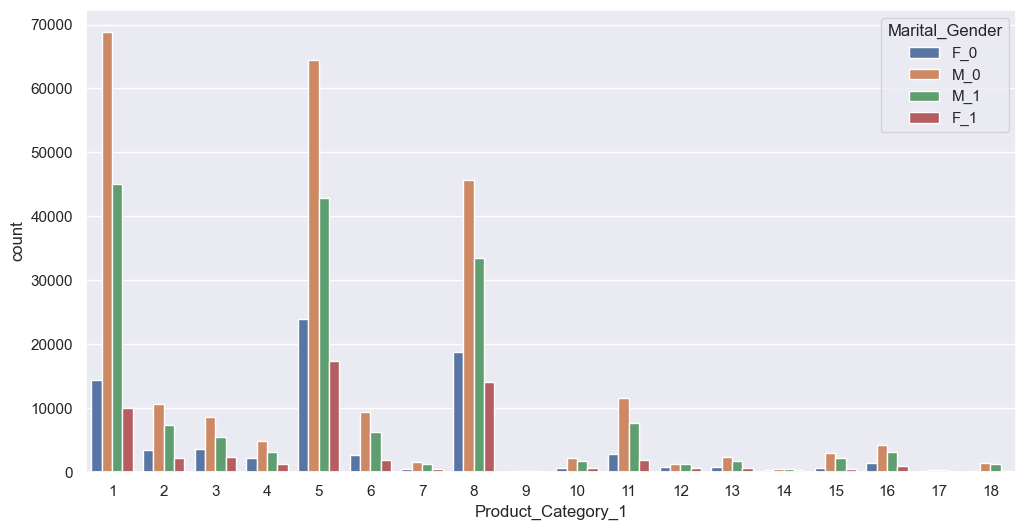

In [148]:
sns.countplot(x=df.Product_Category_1,hue=df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

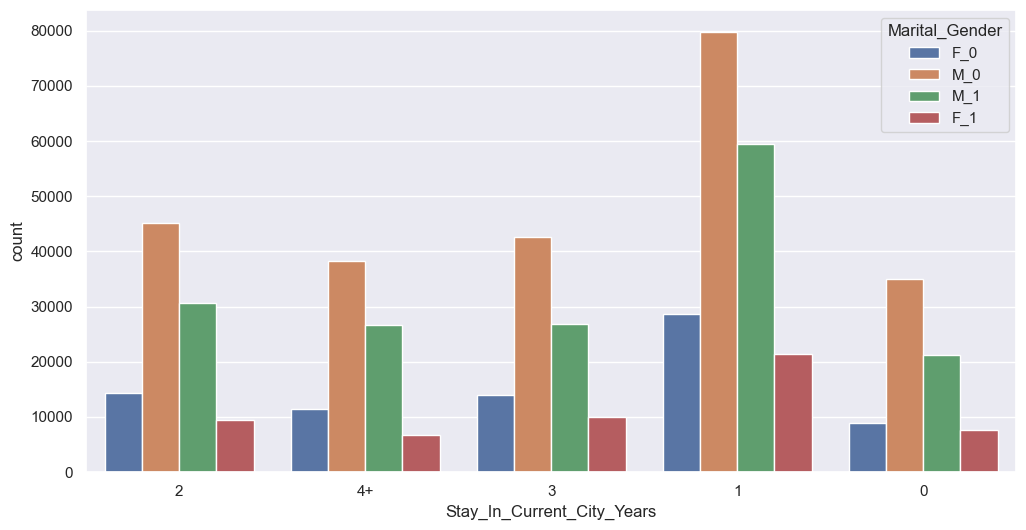

In [149]:
sns.countplot(x=df.Stay_In_Current_City_Years,hue=df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

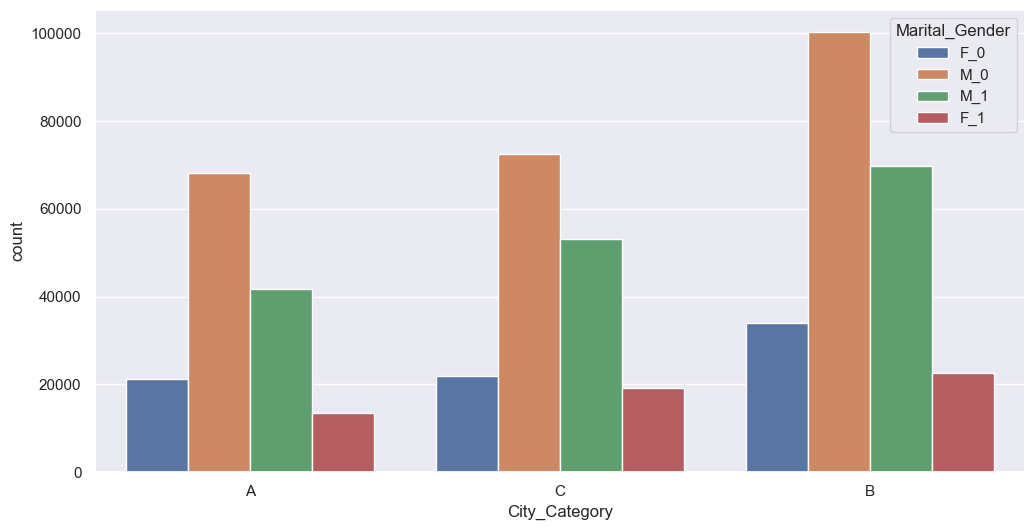

In [150]:
sns.countplot(x=df.City_Category,hue=df['Marital_Gender'])